Importing relavant libraries

In [51]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint as sp_randint

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

Reading Train and Test Set

In [3]:
df = pd.read_csv('C:/Users/drako/Desktop/kaggle/home-credit-default-risk/application_train.csv')
test_df = pd.read_csv('C:/Users/drako/Desktop/kaggle/home-credit-default-risk/application_test.csv')

EDA (Exploratory Data Analysis)

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df.shape

(307511, 122)

In [6]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

Using Pieplots to visualise

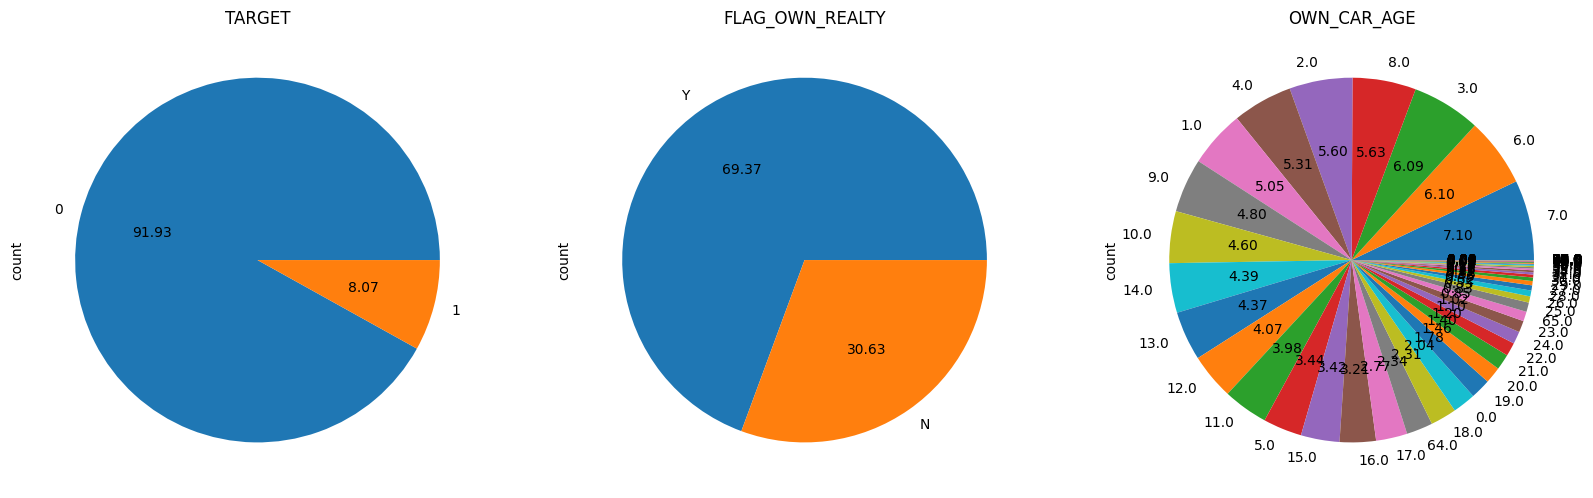

In [7]:
columns = ['TARGET', 'FLAG_OWN_REALTY', 'OWN_CAR_AGE']

fig, axs = plt.subplots(nrows=1, ncols=len(columns), figsize=(20,20))

for i, column in enumerate(columns):
    df[column].value_counts().plot(kind='pie', ax=axs[i], autopct='%.2f')
    axs[i].set_title(column)

plt.show()

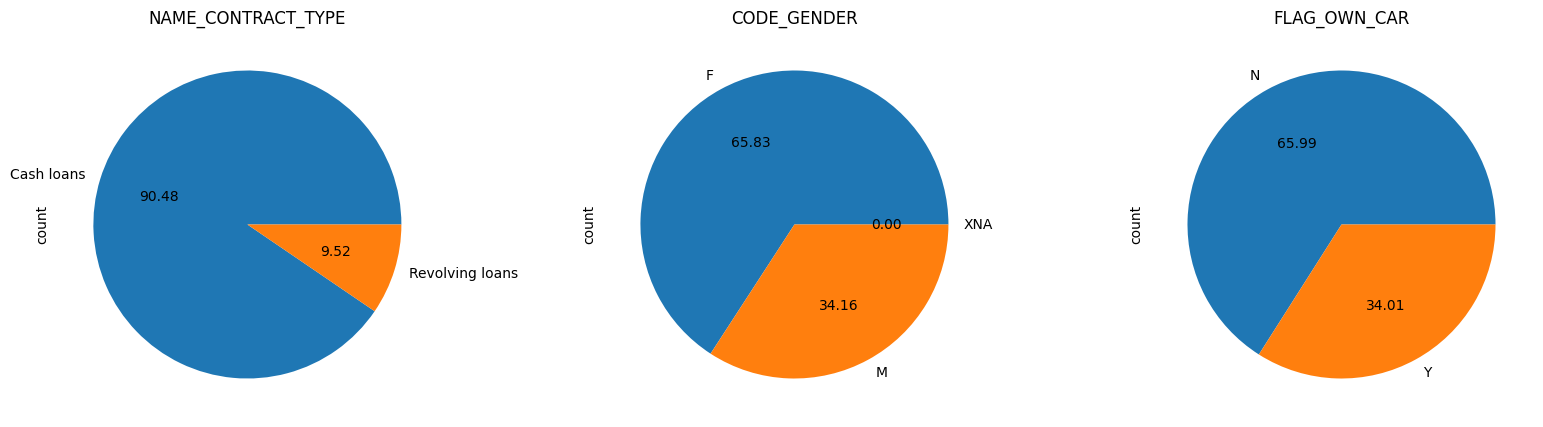

In [8]:
columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR']

fig, axs = plt.subplots(nrows=1, ncols=len(columns), figsize=(20,5))

for i, column in enumerate(columns):
    df[column].value_counts().plot(kind='pie', ax=axs[i], autopct='%.2f')
    axs[i].set_title(column)

plt.show()

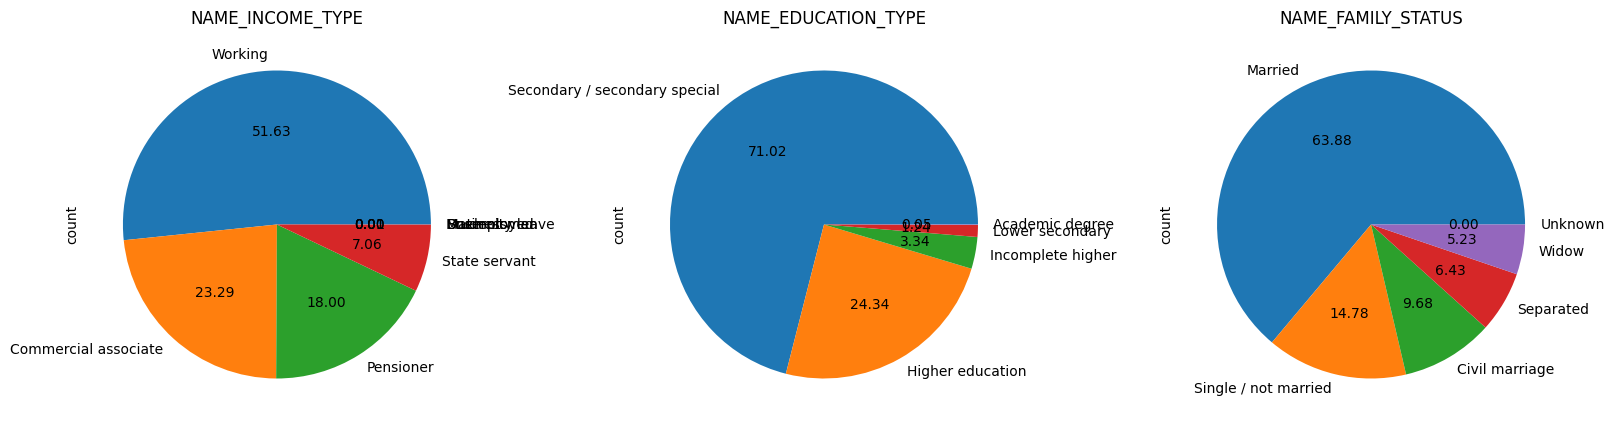

In [9]:
columns = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',  'NAME_FAMILY_STATUS']

fig, axs = plt.subplots(nrows=1, ncols=len(columns), figsize=(20,5))

for i, column in enumerate(columns):
    df[column].value_counts().plot(kind='pie', ax=axs[i], autopct='%.2f')
    axs[i].set_title(column)

plt.show()

In [10]:
info = pd.concat([df.dtypes, df.isnull().sum()], axis=1)
info.columns = ['datatype', 'missing_values']
info['missing_percentage'] = round(info['missing_values'] / len(df) * 100, 2)
pd.set_option('display.max_rows', info.shape[0]+1)
print(info)


                             datatype  missing_values  missing_percentage
SK_ID_CURR                      int64               0                0.00
TARGET                          int64               0                0.00
NAME_CONTRACT_TYPE             object               0                0.00
CODE_GENDER                    object               0                0.00
FLAG_OWN_CAR                   object               0                0.00
FLAG_OWN_REALTY                object               0                0.00
CNT_CHILDREN                    int64               0                0.00
AMT_INCOME_TOTAL              float64               0                0.00
AMT_CREDIT                    float64               0                0.00
AMT_ANNUITY                   float64              12                0.00
AMT_GOODS_PRICE               float64             278                0.09
NAME_TYPE_SUITE                object            1292                0.42
NAME_INCOME_TYPE               object 

Handling missing values

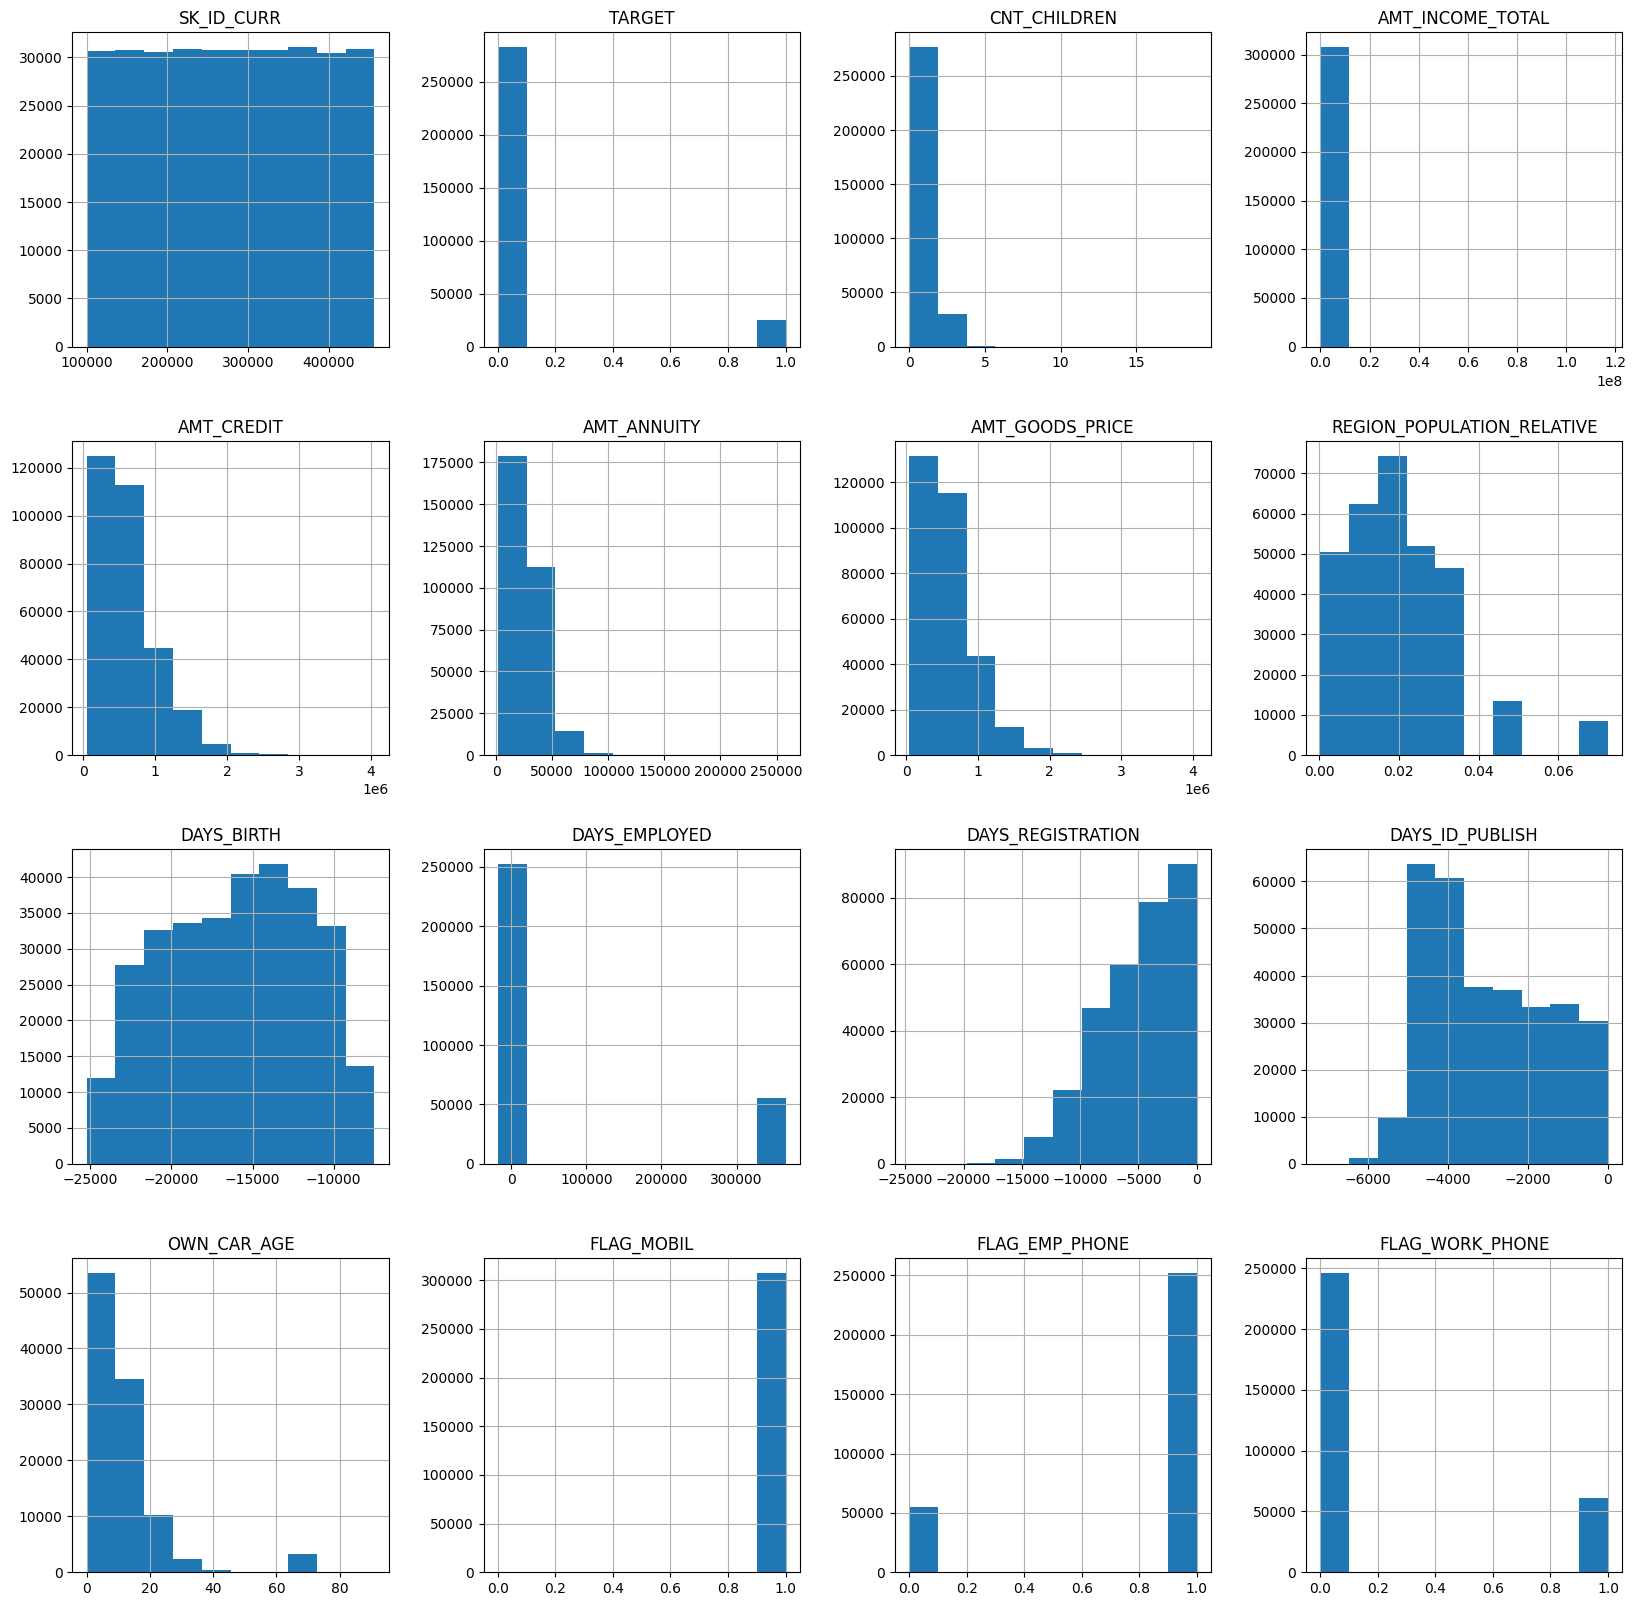

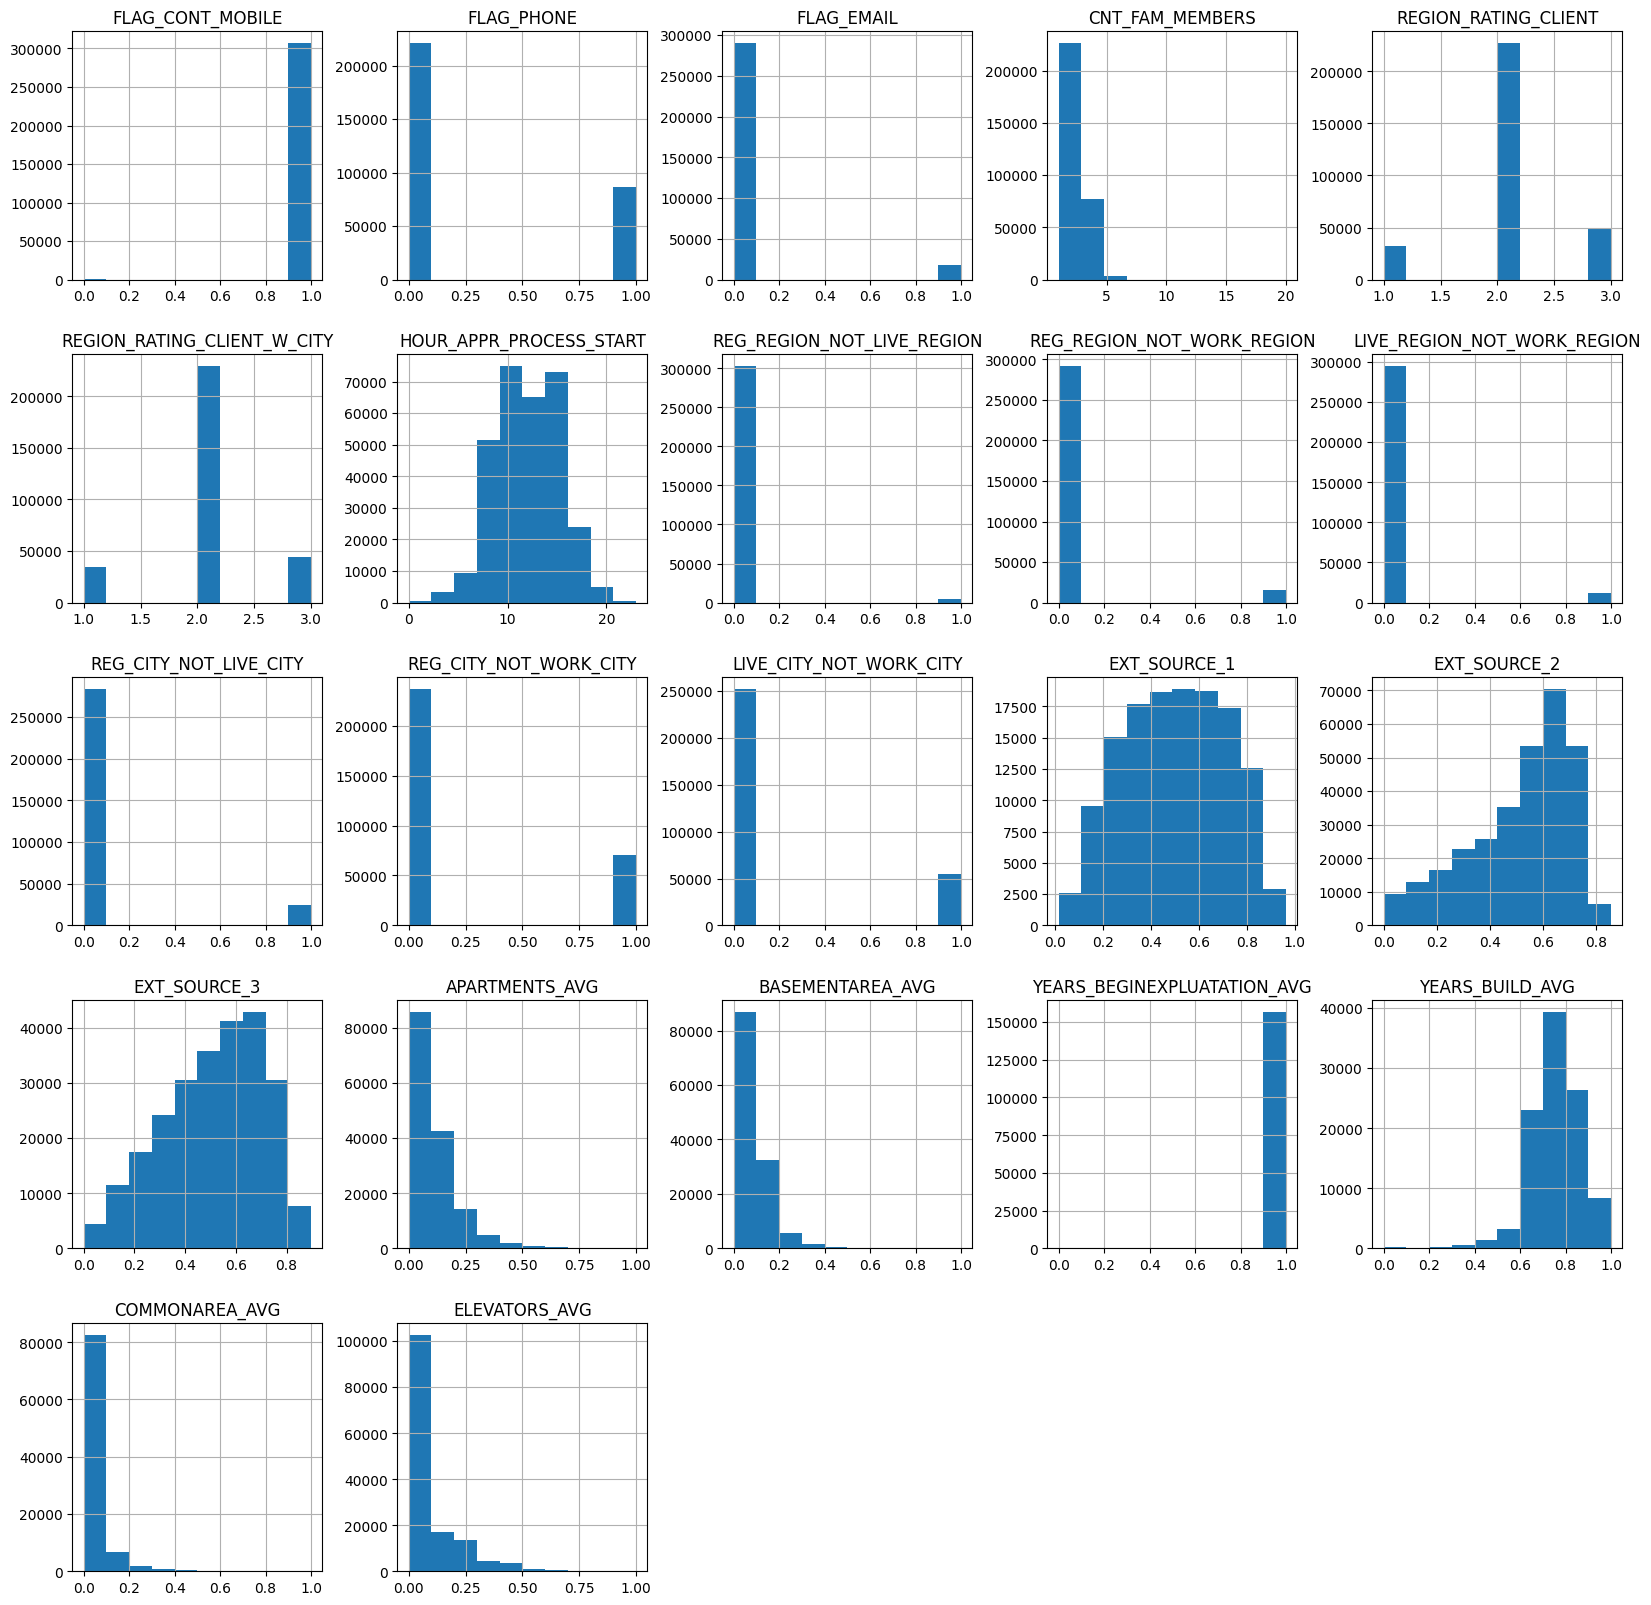

In [11]:
df.iloc[:, :25].hist(figsize=(20,20))
plt.show()

df.iloc[:, 25:50].hist(figsize=(20,20))
plt.show()

Filling own_car_age  as 0 for people who dont own car .

In [12]:
df['OWN_CAR_AGE'].fillna(0, inplace=True)

Filling Missing values for the columns with mode.

In [13]:
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mode()[0], inplace=True)
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mode()[0], inplace=True)

EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, has a normal distribution and already normalized. Fill null with Mean

In [14]:
df['EXT_SOURCE_1'].fillna(df['EXT_SOURCE_1'].mean(), inplace=True)
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean(), inplace=True)
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean(), inplace=True)

Column name with suffix, use the avg and mode

In [15]:
avg_cols = [col for col in df.columns if col.endswith('_AVG')]
means = df[avg_cols].mean()
df[avg_cols] = df[avg_cols].fillna(means)

mode_cols = [col for col in df.columns if col.endswith('_MODE')]
modes = df[mode_cols].mode()
df[mode_cols] = df[mode_cols].fillna(modes.iloc[0])

medi_cols = [col for col in df.columns if col.endswith('_MEDI')]
medis = df[medi_cols].median()
df[medi_cols] = df[medi_cols].fillna(medis)

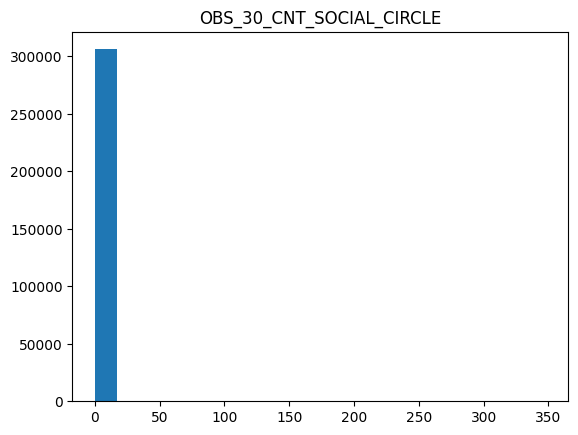

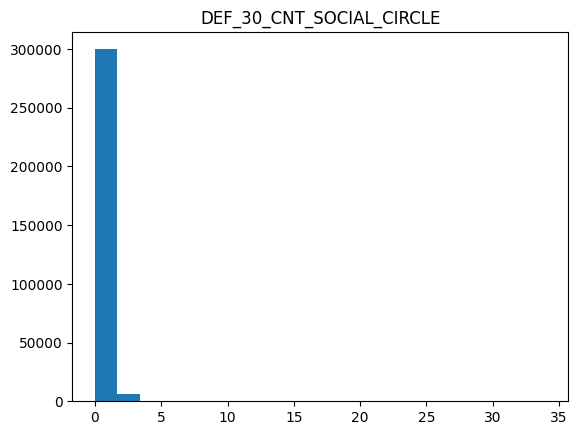

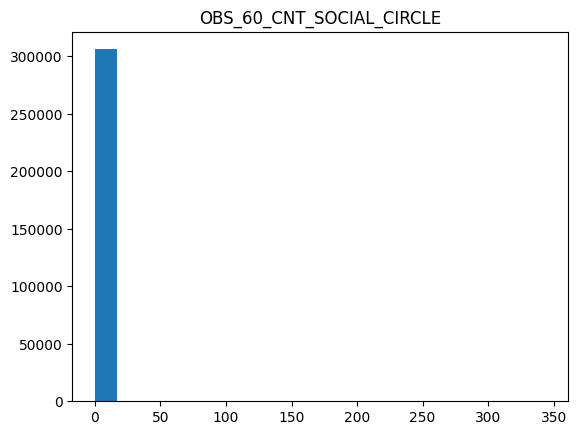

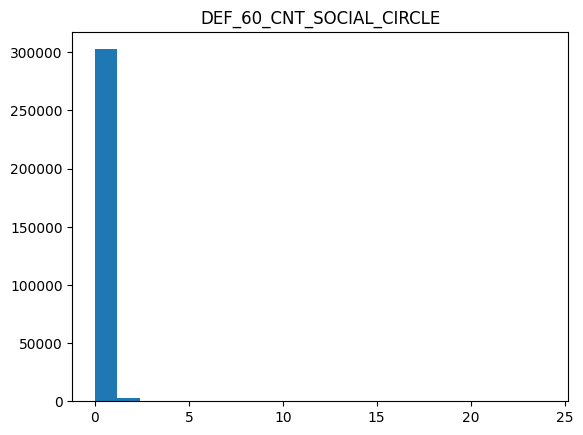

In [16]:
cnt_cols = [col for col in df.columns if col.endswith('CNT_SOCIAL_CIRCLE')]

for col in cnt_cols:
    plt.hist(df[col].dropna(), bins=20)
    plt.title(col)
    plt.show()

fill columns with the min value

In [17]:
circle_cols = [col for col in df.columns if col.endswith('CNT_SOCIAL_CIRCLE')]
mins = df[circle_cols].min()
df[circle_cols] = df[circle_cols].fillna(mins)

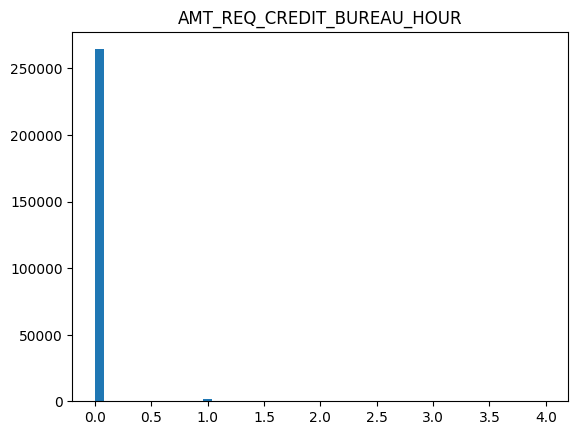

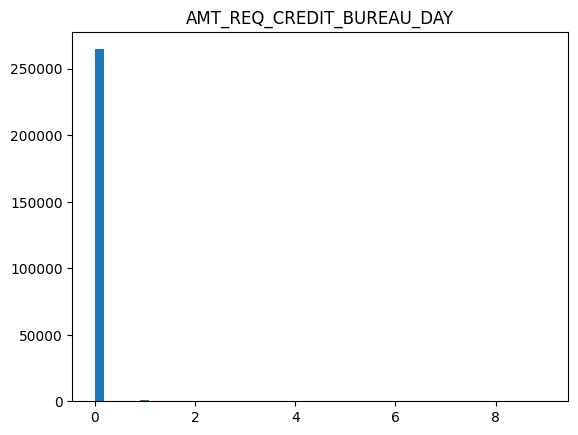

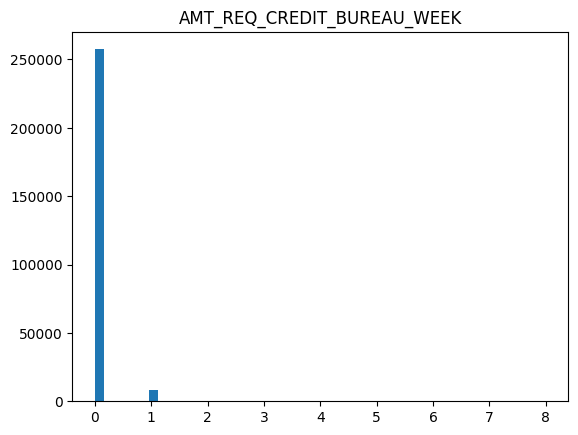

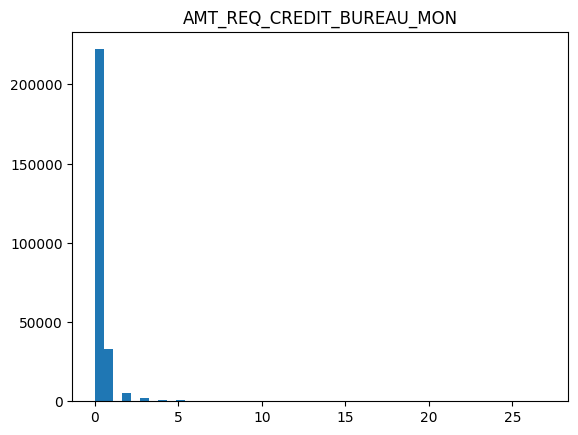

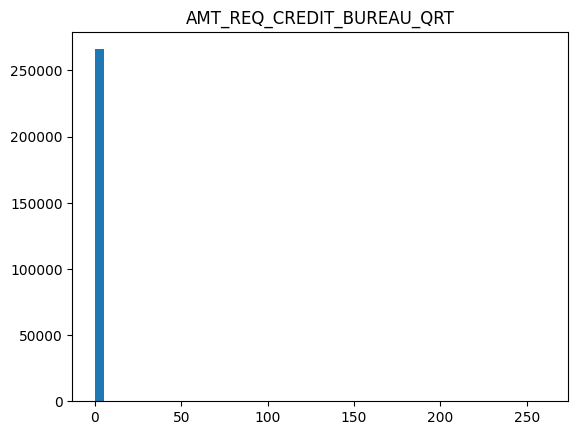

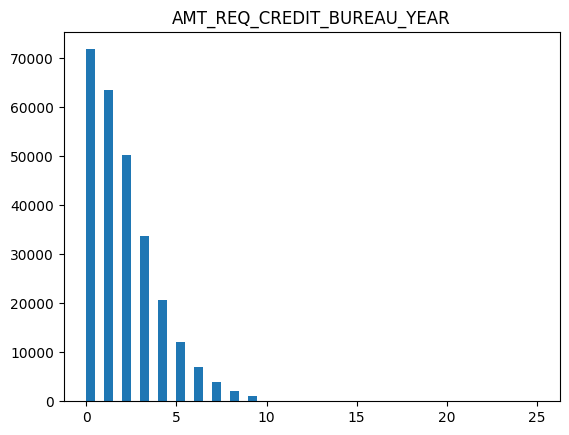

In [18]:
amt_cols = [col for col in df.columns if col.startswith('AMT_REQ_CREDIT_BUREAU')]

for col in amt_cols:
    plt.hist(df[col].dropna(), bins=50)
    plt.title(col)
    plt.show()

In [19]:
medians = df[amt_cols].median()
df[amt_cols] = df[amt_cols].fillna(medians)

Filled all the numerical type need to fill object type

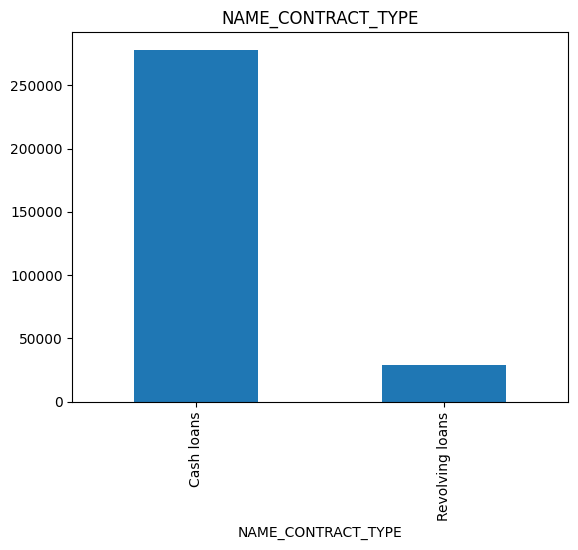

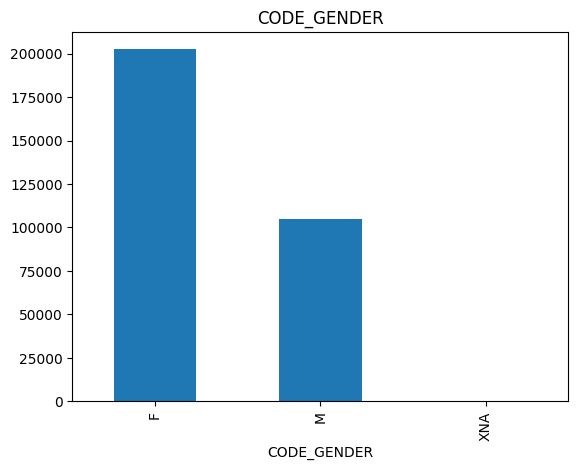

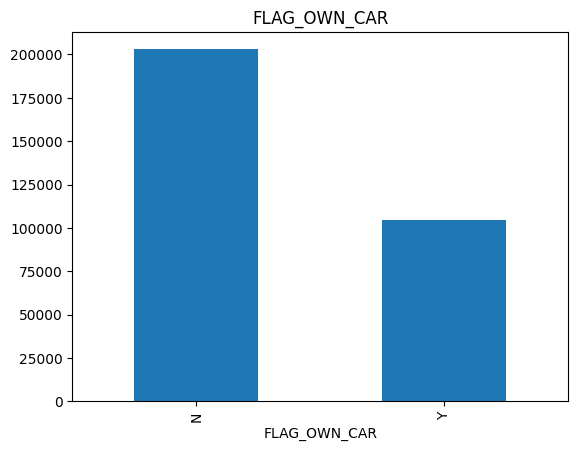

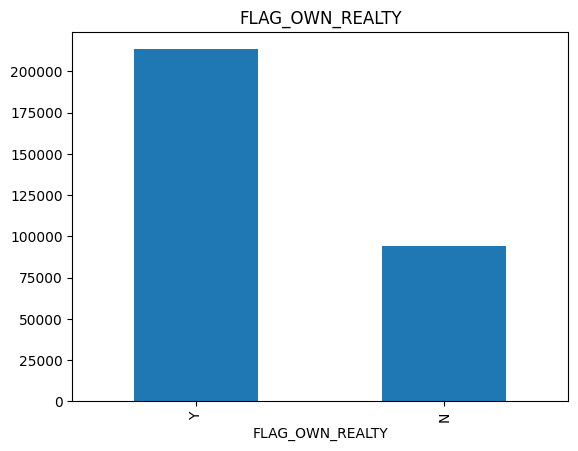

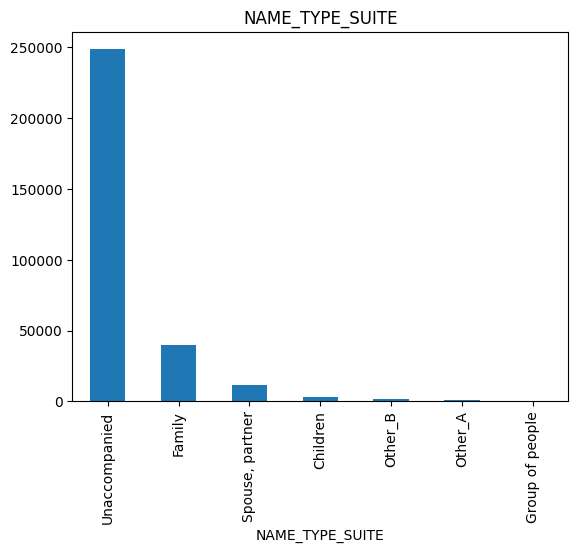

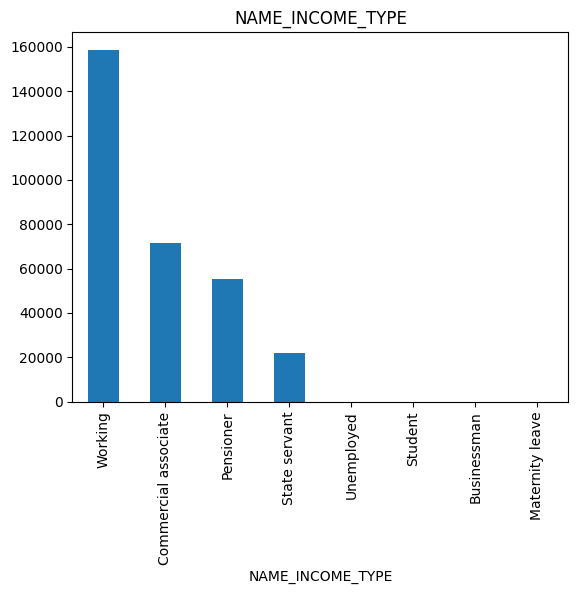

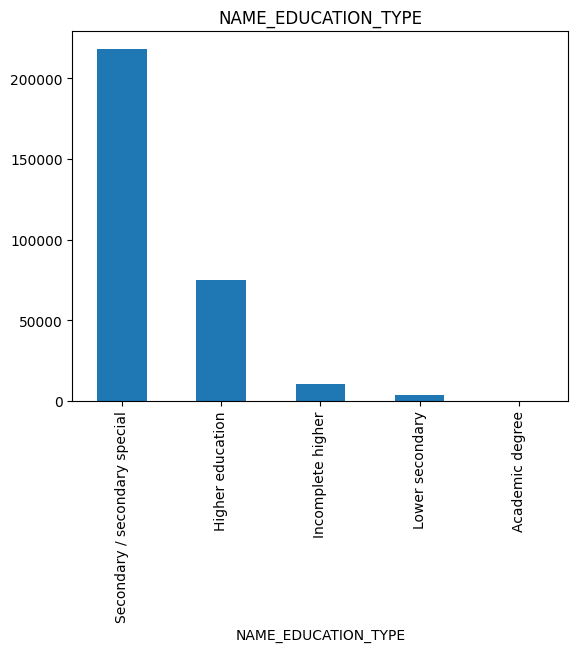

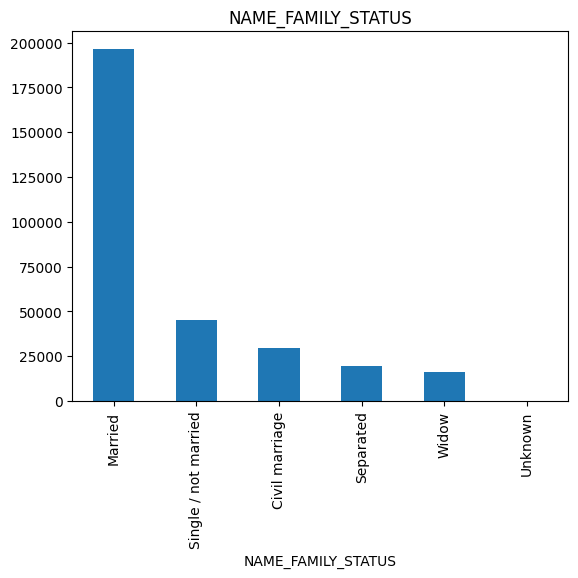

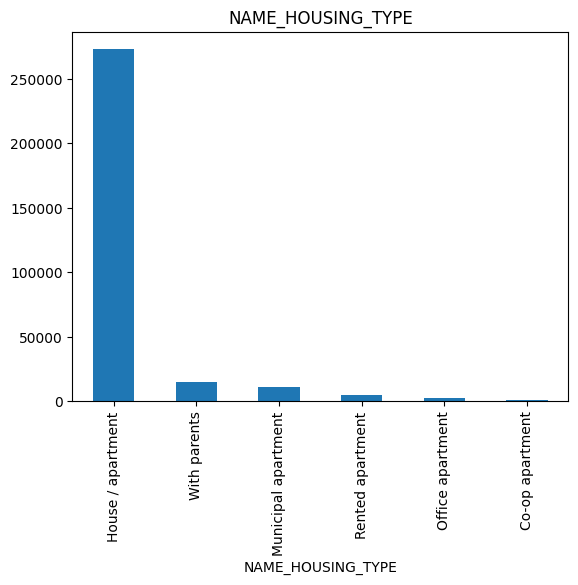

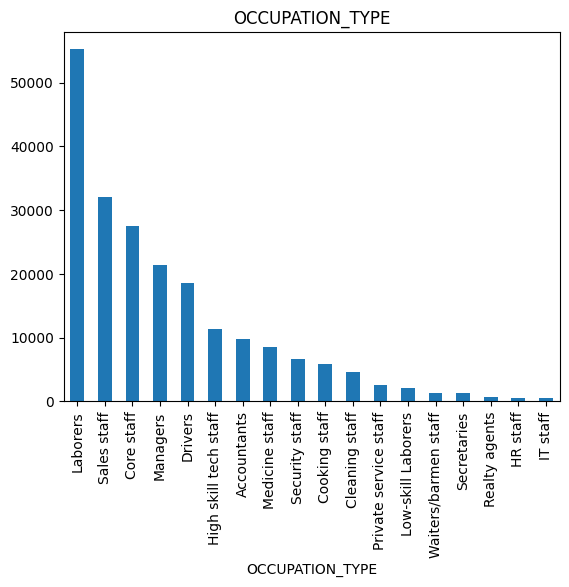

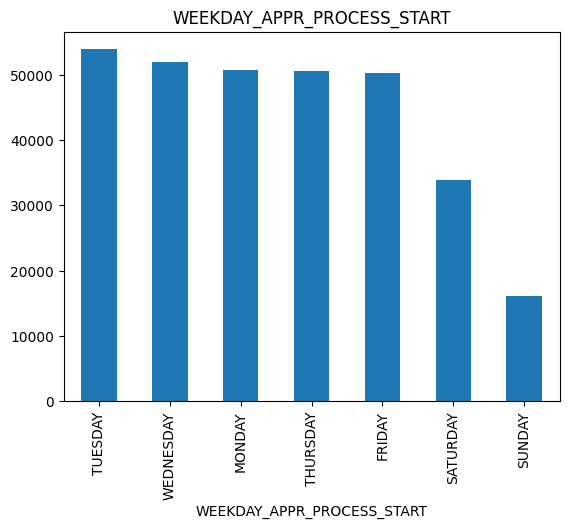

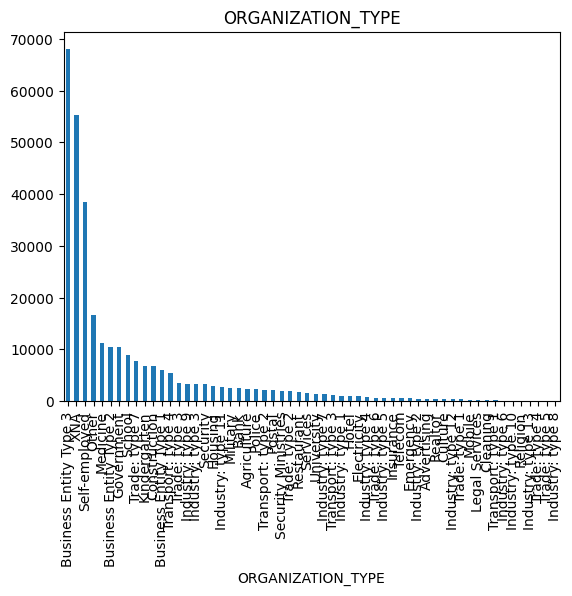

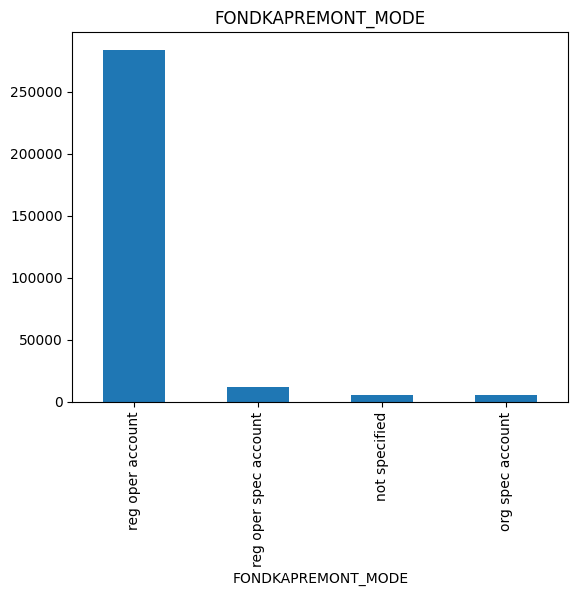

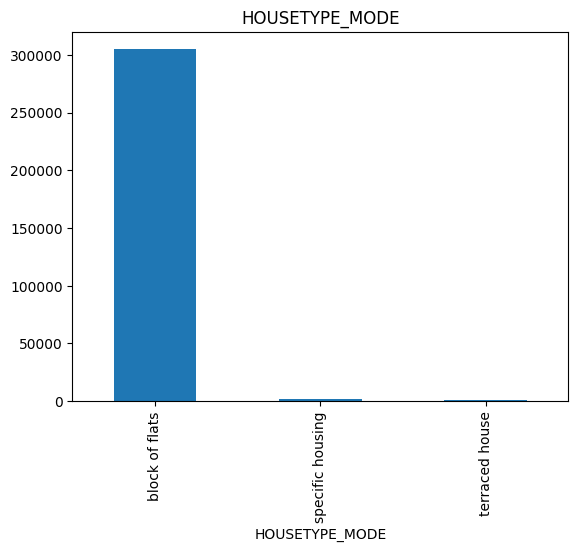

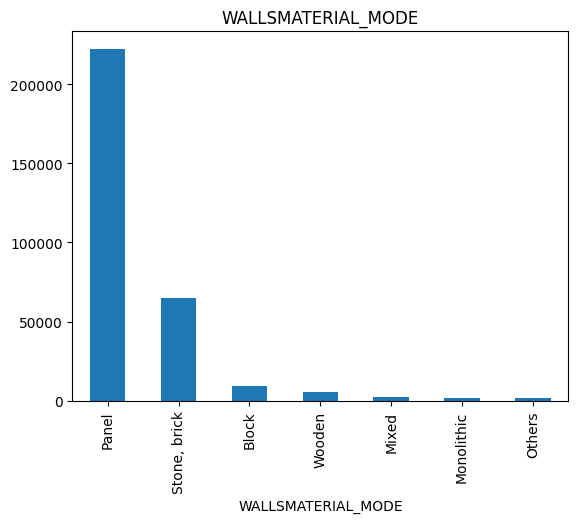

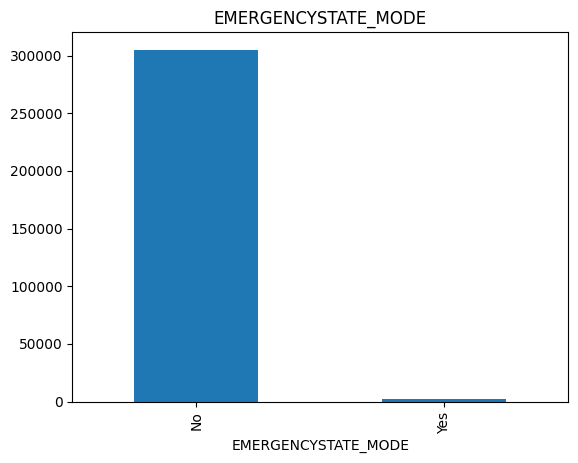

In [20]:
for col in df.select_dtypes(include='object').columns:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

filling missing values with the most frequent values

In [21]:
for col in df.select_dtypes(include='object').columns:
    freqs = df[col].value_counts(normalize=True)
    df[col].fillna(pd.Series(freqs).sample(n=1, weights=freqs.values).values[0], inplace=True)

In [22]:
info = pd.concat([df.dtypes, df.isnull().sum()], axis=1)
info.columns = ['datatype', 'missing_values']
info['missing_percentage'] = round(info['missing_values'] / len(df) * 100, 2)
pd.set_option('display.max_rows', info.shape[0]+1)
print(info)


                             datatype  missing_values  missing_percentage
SK_ID_CURR                      int64               0                 0.0
TARGET                          int64               0                 0.0
NAME_CONTRACT_TYPE             object               0                 0.0
CODE_GENDER                    object               0                 0.0
FLAG_OWN_CAR                   object               0                 0.0
FLAG_OWN_REALTY                object               0                 0.0
CNT_CHILDREN                    int64               0                 0.0
AMT_INCOME_TOTAL              float64               0                 0.0
AMT_CREDIT                    float64               0                 0.0
AMT_ANNUITY                   float64               0                 0.0
AMT_GOODS_PRICE               float64               0                 0.0
NAME_TYPE_SUITE                object               0                 0.0
NAME_INCOME_TYPE               object 

In [23]:
df.dropna(inplace=True)

Similarly cleaning data for the test data

In [24]:
test_df['AMT_ANNUITY'].fillna(test_df['AMT_ANNUITY'].mode()[0], inplace=True)
test_df['AMT_GOODS_PRICE'].fillna(test_df['AMT_GOODS_PRICE'].mode()[0], inplace=True)
test_df['OWN_CAR_AGE'].fillna(0, inplace=True)
test_df['EXT_SOURCE_1'].fillna(test_df['EXT_SOURCE_1'].mean(), inplace=True)
test_df['EXT_SOURCE_2'].fillna(test_df['EXT_SOURCE_2'].mean(), inplace=True)
test_df['EXT_SOURCE_3'].fillna(test_df['EXT_SOURCE_3'].mean(), inplace=True)
avg_cols = [col for col in test_df.columns if col.endswith('_AVG')]
means = test_df[avg_cols].mean()
test_df[avg_cols] = test_df[avg_cols].fillna(means)

mode_cols = [col for col in test_df.columns if col.endswith('_MODE')]
modes = test_df[mode_cols].mode()
test_df[mode_cols] = test_df[mode_cols].fillna(modes.iloc[0])

medi_cols = [col for col in test_df.columns if col.endswith('_MEDI')]
medis = test_df[medi_cols].median()
test_df[medi_cols] = test_df[medi_cols].fillna(medis)
circle_cols = [col for col in test_df.columns if col.endswith('CNT_SOCIAL_CIRCLE')]
mins = test_df[circle_cols].min()
test_df[circle_cols] = test_df[circle_cols].fillna(mins)
medians = test_df[amt_cols].median()
test_df[amt_cols] = test_df[amt_cols].fillna(medians)
for col in test_df.select_dtypes(include='object').columns:
    freqs = test_df[col].value_counts(normalize=True)
    test_df[col].fillna(pd.Series(freqs).sample(n=1, weights=freqs.values).values[0], inplace=True)

In [25]:
info = pd.concat([test_df.dtypes, test_df.isnull().sum()], axis=1)
info.columns = ['datatype', 'missing_values']
info['missing_percentage'] = round(info['missing_values'] / len(test_df) * 100, 2)
pd.set_option('display.max_rows', info.shape[0]+1)
print(info)


                             datatype  missing_values  missing_percentage
SK_ID_CURR                      int64               0                 0.0
NAME_CONTRACT_TYPE             object               0                 0.0
CODE_GENDER                    object               0                 0.0
FLAG_OWN_CAR                   object               0                 0.0
FLAG_OWN_REALTY                object               0                 0.0
CNT_CHILDREN                    int64               0                 0.0
AMT_INCOME_TOTAL              float64               0                 0.0
AMT_CREDIT                    float64               0                 0.0
AMT_ANNUITY                   float64               0                 0.0
AMT_GOODS_PRICE               float64               0                 0.0
NAME_TYPE_SUITE                object               0                 0.0
NAME_INCOME_TYPE               object               0                 0.0
NAME_EDUCATION_TYPE            object 

Encoding all the objects using label encoder

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column].astype('str'))
for column in test_df.select_dtypes(include='object').columns:
    test_df[column] = le.fit_transform(test_df[column].astype('str'))

In [27]:
X = df.drop('TARGET', axis=1, inplace=False)
y = df['TARGET']

<Axes: ylabel='count'>

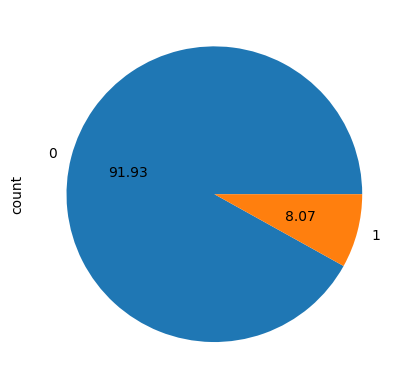

In [28]:
y.value_counts().plot.pie(autopct='%.2f')

We can clearly see its an imbalanced data

In [29]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(sampling_strategy="minority")
X_sm,Y_sm = smote.fit_resample(X,y)

<Axes: ylabel='count'>

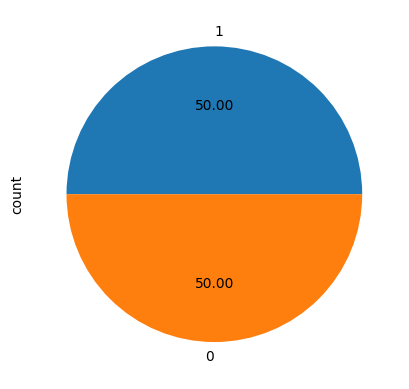

In [30]:
Y_sm.value_counts().plot.pie(autopct='%.2f')

In [31]:
Y_sm.value_counts()

TARGET
1    282683
0    282683
Name: count, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, Y_sm, test_size=0.20,random_state=45)

In [34]:
y_train.value_counts()

TARGET
1    226291
0    226001
Name: count, dtype: int64

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=76)
pca.fit(X_train_norm)
X_train_red = pca.transform(X_train_norm)
X_test_red = pca.transform(X_test_norm)

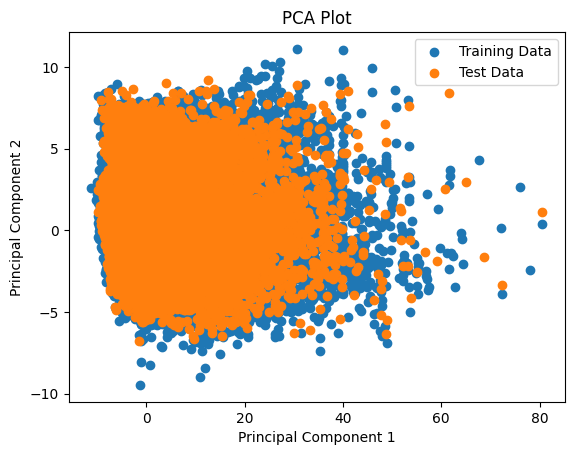

In [38]:
plt.scatter(X_train_red[:, 0], X_train_red[:, 1], label='Training Data')
plt.scatter(X_test_red[:, 0], X_test_red[:, 1], label='Test Data')

# Add axis labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score

def roc(X, y, model):
    return roc_auc_score(y, model.predict_proba(X)[:, 1])

In [40]:
rf = RandomForestClassifier(n_estimators=20,
    max_features=0.5,
    max_samples=0.5,
    min_samples_leaf=125,
    n_jobs=-1,
    oob_score=True,
    random_state=42)
rf.fit(X_train_red, y_train)

RandomForestClassifier(max_features=0.5, max_samples=0.5, min_samples_leaf=125,
                       n_estimators=20, n_jobs=-1, oob_score=True,
                       random_state=42)

In [41]:
roc(X_train_red, y_train, rf)

0.9084840350006536

In [42]:
roc(X_test_red, y_test, rf)

0.8970480261817015

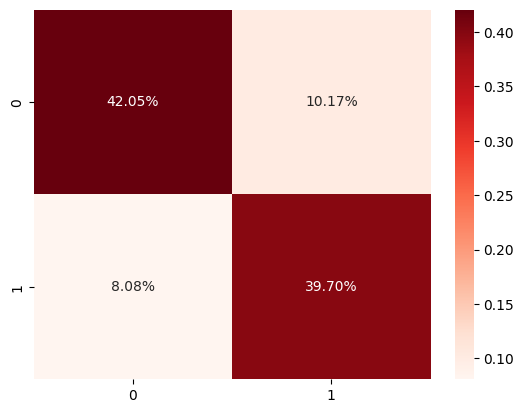

In [43]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(rf.predict(X_test_red), y_test)/np.sum(confusion_matrix(rf.predict(X_test_red), y_test)),
            annot = True, fmt='.2%', cmap='Reds');

In [44]:
pred_r = rf.predict(X_test_red)

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_r))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82     56682
           1       0.83      0.80      0.81     56392

    accuracy                           0.82    113074
   macro avg       0.82      0.82      0.82    113074
weighted avg       0.82      0.82      0.82    113074



In [56]:
# Define the parameter grid
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Initialize a Random Forest Classifier
rf = RandomForestClassifier()

# Use randomized search CV to find the best hyperparameters
n_iter_search = 3  # Number of random searches
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=n_iter_search, cv=5, random_state=42)

# Fit the model to the data
random_search.fit(X_train_red, y_train)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters: ", random_search.best_params_)
print("Accuracy: ", random_search.best_score_)

Best Hyperparameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 5, 'min_samples_split': 3}
Accuracy:  0.7746942257505288


In [59]:
rf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=3, max_features=6, min_samples_leaf=5, min_samples_split=3)
rf.fit(X_train_red, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=3,
                       max_features=6, min_samples_leaf=5, min_samples_split=3)

In [60]:
roc(X_train_red, y_train, rf)

0.8519357731233208

In [61]:
roc(X_test_red, y_test, rf)

0.850892616998546

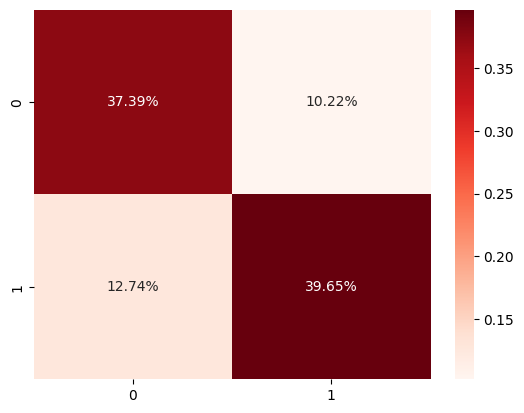

In [62]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(rf.predict(X_test_red), y_test)/np.sum(confusion_matrix(rf.predict(X_test_red), y_test)),
            annot = True, fmt='.2%', cmap='Reds');

In [63]:
pred_r = rf.predict(X_test_red)

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_r))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     56682
           1       0.76      0.80      0.78     56392

    accuracy                           0.77    113074
   macro avg       0.77      0.77      0.77    113074
weighted avg       0.77      0.77      0.77    113074



In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
param_lr = dict(C= list((1e-4, 1e-3, 1e-2, 1e-1, 1)), penalty= ['l1', 'l2'])

lr_score = []
i = 42
lr = LogisticRegression(class_weight = {1:5, 0:1})

grid_lr = RandomizedSearchCV(lr, param_lr, cv = KFold(n_splits=3, shuffle=True, random_state=i))

grid_lr.fit(X_train_red, y_train)
lr_score.append(grid_lr.best_score_)

In [66]:
y_pred = grid_lr.predict(X_test_red)

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.45      0.61     56682
           1       0.64      0.97      0.77     56392

    accuracy                           0.71    113074
   macro avg       0.78      0.71      0.69    113074
weighted avg       0.78      0.71      0.69    113074



In [68]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators':[250,500,750],'learning_rate':[0.001,0.01,0.1],'max_depth':[1,2,3,4,5,6]}

xgb2 = XGBClassifier(objective='binary:logistic',random_state=42,tree_method='gpu_hist')
clf = RandomizedSearchCV(xgb2,params,cv=3,scoring='roc_auc')
clf.fit(X_train_red, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [250, 500, 750]},
                   scoring='roc_auc')

In [69]:
clf.best_params_

{'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.1}

In [70]:
clf.best_score_

0.936725838669728

In [71]:
auc2 = roc_auc_score(y_test, clf.predict(X_test_red))
print("xgb2 auc: %.4f" % auc2)

xgb2 auc: 0.8693


In [72]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [73]:
xgb_tuned = XGBClassifier(objective='binary:logistic',random_state=42,tree_method='gpu_hist',n_estimators=750,learning_rate=0.1,max_depth=2)
xgb_tuned.fit(X_train_red, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=750, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [74]:
pred = xgb_tuned.predict(X_test_red)

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     56682
           1       0.86      0.85      0.86     56392

    accuracy                           0.86    113074
   macro avg       0.86      0.86      0.86    113074
weighted avg       0.86      0.86      0.86    113074

